In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
from bokeh.layouts import layout
from bokeh.models.widgets import Dropdown
from bokeh.models import CustomJS, Slider, ColumnDataSource, WidgetBox,Button, RadioButtonGroup, Select,Panel,Tabs

In [3]:
#Visualization libraries
import matplotlib
import bokeh
from bokeh import mpl
from bokeh.charts import Line,HeatMap
from bokeh.charts import Histogram,Scatter
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook,hplot
output_notebook()

Loading BokehJS ...

In [4]:
import seaborn as sns
sns.set_style('whitegrid') #sets the grid-color of the seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#This helps to read stock information from Yahoo finance
from pandas_datareader.data import  DataReader

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end_date = datetime.now()

start_date = datetime(end_date.year-1,end_date.month,end_date.day)

In [10]:
for stocks in stock_list:
    globals()[stocks] = DataReader(stocks,'yahoo',start_date,end_date)

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,108.970001,110.610001,108.830002,109.019997,29407500,106.762999
2016-04-12,109.339996,110.500000,108.660004,110.440002,27232300,108.153607
2016-04-13,110.800003,112.339996,110.800003,112.040001,33257300,109.720482
2016-04-14,111.620003,112.389999,111.330002,112.099998,25473900,109.779237
2016-04-15,112.110001,112.300003,109.730003,109.849998,46939000,107.575818


In [12]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,743.020020,745.000000,736.049988,736.099976,1220100,736.099976
2016-04-12,738.000000,743.830017,731.010010,743.090027,1353000,743.090027
2016-04-13,749.159973,754.380005,744.260986,751.719971,1707100,751.719971
2016-04-14,754.010010,757.309998,752.705017,753.200012,1135300,753.200012
2016-04-15,753.979980,761.000000,752.693970,759.000000,1809300,759.000000


In [13]:
MSFT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,54.490002,55.150002,54.299999,54.310001,21414200,52.918234
2016-04-12,54.369999,54.779999,53.759998,54.650002,24944300,53.249521
2016-04-13,55.119999,55.439999,54.889999,55.349998,20818000,53.931579
2016-04-14,55.220001,55.580002,55.070000,55.360001,20877100,53.941325
2016-04-15,55.299999,55.919998,55.110001,55.650002,28793800,54.223894


In [14]:
AMZN.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,596.140015,604.000000,594.909973,595.929993,2704300,595.929993
2016-04-12,598.400024,604.059998,592.309998,603.169983,2641100,603.169983
2016-04-13,607.679993,616.809998,605.289978,614.820007,4228300,614.820007
2016-04-14,615.070007,624.380005,615.070007,620.750000,3512100,620.750000
2016-04-15,621.919983,626.770020,618.109985,625.890015,2887700,625.890015


In [15]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,112.959167,113.808095,112.298730,113.126349,3.367346e+07,112.217137
std,14.295354,14.293975,14.371741,14.388670,1.563253e+07,14.880650
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.987502,103.734998,101.832499,102.314999,2.449592e+07,100.806859
50%,110.920002,112.009998,110.040001,111.345001,2.920455e+07,110.491208
75%,118.007498,118.842502,117.572498,118.435000,3.643442e+07,117.669835
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [16]:
#plotting adjusted-close price of Apple's stock
p1=Line(AAPL['Adj Close'],title='APPLE-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p1)
#plt.close()

In [17]:
p2=Line(GOOG['Adj Close'],title='GOOGLE-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p2)

In [18]:
p3=Line(MSFT['Adj Close'],title='MICROSOFT-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p3)

In [19]:
p4=Line(AMZN['Adj Close'],title='AMAZON-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p4)

In [20]:
tab1 = Panel(child=p1,title='Apple')
tab2 = Panel(child=p2,title='Google')
tab3 = Panel(child=p3,title='Microsoft')
tab4 = Panel(child=p4,title='Amazon')
tabs1 = Tabs(tabs=[tab1,tab2,tab3,tab4])
output_file('Adj-Close.html')
show(tabs1)
#select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))

In [21]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()
    GOOG[column_name]=GOOG['Adj Close'].rolling(window=ma).mean()
    MSFT[column_name]=MSFT['Adj Close'].rolling(window=ma).mean()
    AMZN[column_name]=AMZN['Adj Close'].rolling(window=ma).mean()

In [22]:
p5=Line(AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#plot(subplots=False,figsize=(10,4))
#show(p)

In [23]:
p6=Line(GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [24]:
p7=Line(MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [25]:
p8=Line(AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [26]:
tab5 = Panel(child=p5,title='Apple')
tab6 = Panel(child=p6,title='Google')
tab7 = Panel(child=p7,title='Microsoft')
tab8 = Panel(child=p8,title='Amazon')
tabs2 = Tabs(tabs=[tab5,tab6,tab7,tab8])
output_file('Moving-Average.html')
show(tabs2)
select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))
#tabs=[]

INFO:bokeh.core.state:Session output file 'Moving-Average.html' already exists, will be overwritten.


In [27]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
p9=Line(AAPL['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p10=Line(GOOG['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p11=Line(MSFT['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p12=Line(AMZN['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)

In [28]:
tab9 = Panel(child=p9,title='Apple')
tab10 = Panel(child=p10,title='Google')
tab11 = Panel(child=p11,title='Microsoft')
tab12 = Panel(child=p12,title='Amazon')
tabs3 = Tabs(tabs=[tab9,tab10,tab11,tab12])
output_file('Daily Return.html')
show(tabs3)
#select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))
#tabs=[]

INFO:bokeh.core.state:Session output file 'Daily Return.html' already exists, will be overwritten.


In [29]:
'''#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
p=Histogram(AAPL['Daily Return'].dropna())
output_file('distplot.html')
show(p)
show(mpl.to_bokeh())
#plt.show(subplots=False)'''

"#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')\np=Histogram(AAPL['Daily Return'].dropna())\noutput_file('distplot.html')\nshow(p)\nshow(mpl.to_bokeh())\n#plt.show(subplots=False)"

In [30]:
p13 = Histogram(AAPL['Daily Return'].dropna(),bins=100,plot_height=300)
p14 = Histogram(GOOG['Daily Return'].dropna(),bins=100,plot_height=300)
p15 = Histogram(MSFT['Daily Return'].dropna(),bins=100,plot_height=300)
p16 = Histogram(AMZN['Daily Return'].dropna(),bins=100,plot_height=300)

In [31]:
tab13 = Panel(child=p13,title='Apple')
tab14 = Panel(child=p14,title='Google')
tab15 = Panel(child=p15,title='Microsoft')
tab16 = Panel(child=p16,title='Amazon')
tabs4 = Tabs(tabs=[tab13,tab14,tab15,tab16])
output_file('Histogram.html')
show(tabs4)

INFO:bokeh.core.state:Session output file 'Histogram.html' already exists, will be overwritten.


In [32]:
closing_df = DataReader(stock_list,'yahoo',start_date,end_date)['Adj Close']

In [33]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-11,106.762999,595.929993,736.099976,52.918234
2016-04-12,108.153607,603.169983,743.090027,53.249521
2016-04-13,109.720482,614.820007,751.719971,53.931579
2016-04-14,109.779237,620.750000,753.200012,53.941325
2016-04-15,107.575818,625.890015,759.000000,54.223894


In [34]:
stock_rets = closing_df.pct_change() #daily returns of all the stocks

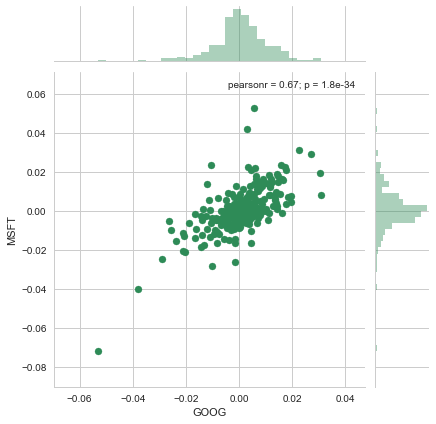

In [35]:
sns.jointplot('GOOG','MSFT',stock_rets,kind='scatter',color='seagreen')

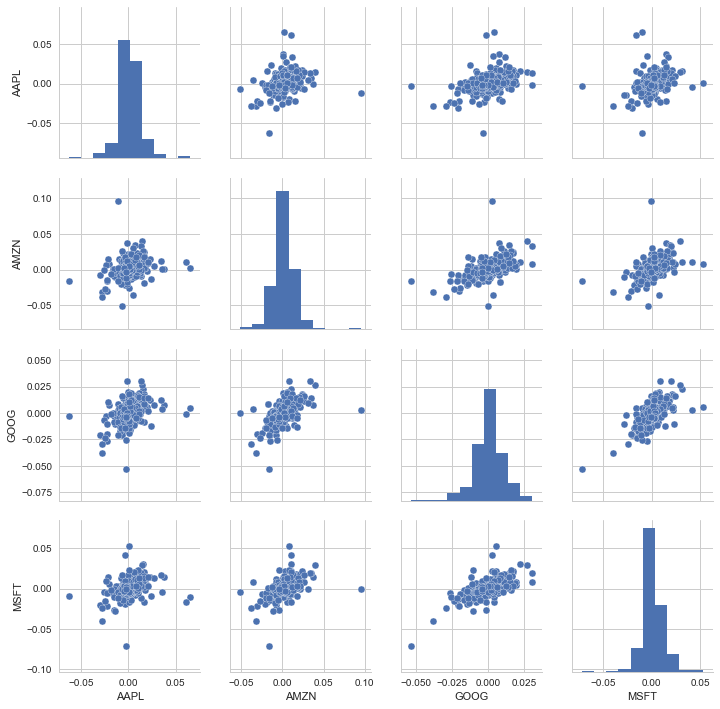

In [36]:
sns.pairplot(stock_rets.dropna())

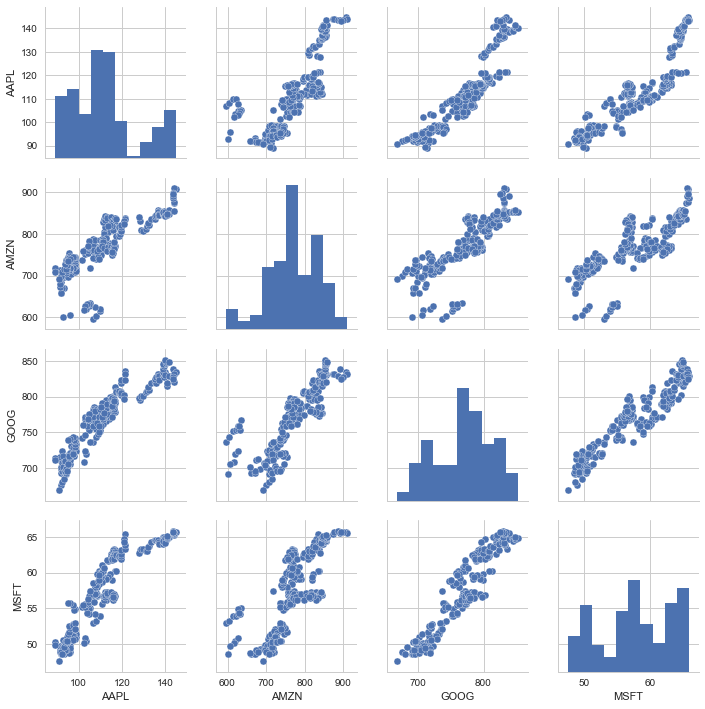

In [37]:
sns.pairplot(closing_df)

In [38]:
'''fig_matrix = sns.PairGrid(stock_rets.dropna())

fig_matrix.map_upper(plt.scatter,color='purple')

fig_matrix.map_lower(sns.kdeplot,cmap='cool_d')

fig_matrix.map_diag(plt.hist,bins=30)'''

"fig_matrix = sns.PairGrid(stock_rets.dropna())\n\nfig_matrix.map_upper(plt.scatter,color='purple')\n\nfig_matrix.map_lower(sns.kdeplot,cmap='cool_d')\n\nfig_matrix.map_diag(plt.hist,bins=30)"

In [39]:
'''fig_matrix = sns.PairGrid(closing_df)

fig_matrix.map_upper(plt.scatter,color='purple')

fig_matrix.map_lower(sns.kdeplot,cmap='cool_d')

fig_matrix.map_diag(plt.hist,bins=30)'''

"fig_matrix = sns.PairGrid(closing_df)\n\nfig_matrix.map_upper(plt.scatter,color='purple')\n\nfig_matrix.map_lower(sns.kdeplot,cmap='cool_d')\n\nfig_matrix.map_diag(plt.hist,bins=30)"

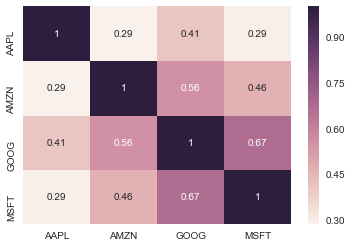

In [40]:
stock_rets_clean=stock_rets.dropna()
correlated = stock_rets_clean.corr()
sns.heatmap(correlated,annot = True)

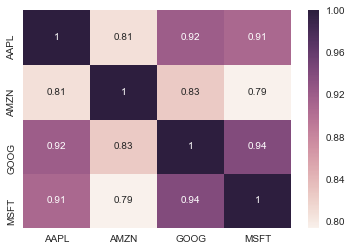

In [41]:
correlated_closing = closing_df.corr()
sns.heatmap(correlated_closing,annot = True)

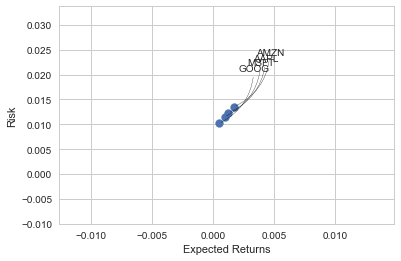

In [42]:
area = np.pi*20
returns = stock_rets.dropna()
plt.scatter(returns.mean(),returns.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [43]:
#With 95% confidence The most amount that is expected to be lost
returns['AAPL'].quantile(0.05) #95% of the time worst daily loss is 1.7%

-0.017359566013096628

In [44]:
returns['GOOG'].quantile(0.05)

-0.016333458773614085

In [45]:
returns['MSFT'].quantile(0.05)

-0.014947101606149815

In [46]:
returns['AMZN'].quantile(0.05)

-0.017070366128934644

In [47]:
#markov process

days = 365

dt = 1/days

mu = returns.mean()['GOOG']

sigma = returns.std()['GOOG']

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [48]:
GOOG.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2017-04-03,829.219971,840.849976,829.219971,838.549988,1670200,838.549988,826.351001,835.019000,825.558901,0.010837
2017-04-04,831.359985,835.179993,829.036011,834.570007,1044400,834.570007,826.762000,835.152002,825.864102,-0.004746
2017-04-05,835.510010,842.450012,830.719971,831.409973,1549400,831.409973,826.943994,834.954001,826.014901,-0.003786
2017-04-06,832.400024,836.390015,826.460022,827.880005,1251600,827.880005,827.973993,834.414001,825.859102,-0.004246
2017-04-07,827.960022,828.484985,820.513000,824.669983,1053300,824.669983,828.997992,833.485001,825.709501,-0.003877


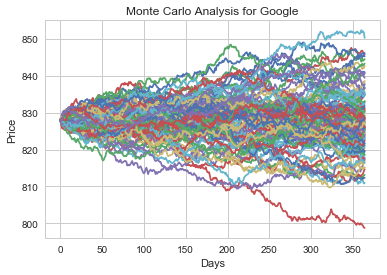

In [49]:
# Get start price from GOOG.head()
start_price = 827.960022

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [50]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

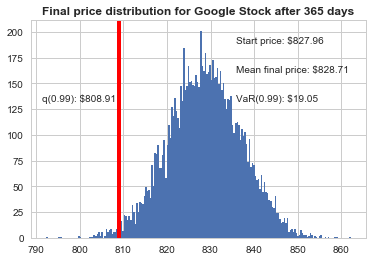

In [51]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [52]:
#AAPL

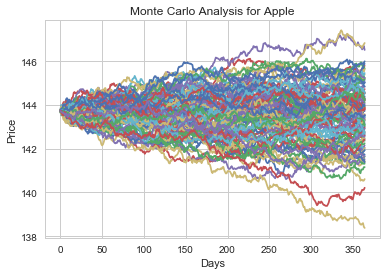

In [53]:
# Get start price from AAPL.head()
start_price = 143.73

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [54]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

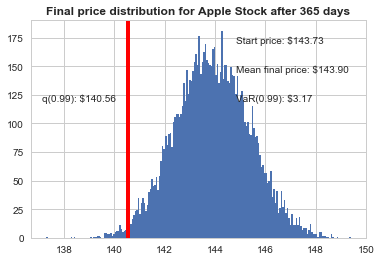

In [55]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

In [56]:
#MSFT

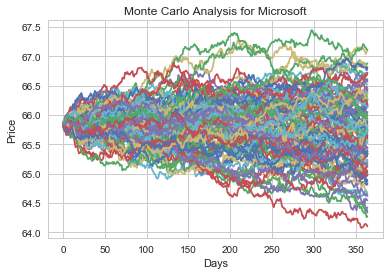

In [57]:
# Get start price from MSFT.head()
start_price = 65.84

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [58]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

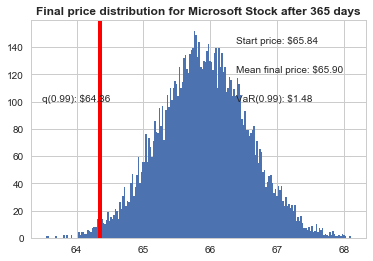

In [59]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [60]:
#AMZN

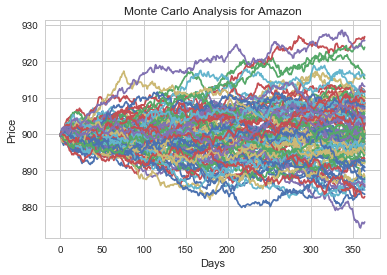

In [61]:
# Get start price from MSFT.head()
start_price = 899.65

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [62]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

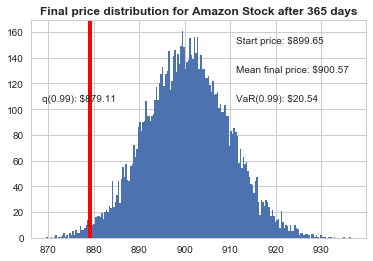

In [63]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');